In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import networkx
import matplotlib.pyplot as plt
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

import warnings
warnings.filterwarnings('ignore')

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from seirsplus.networks import generate_simplified_network, generate_simplified_network_community

In [4]:
WEIGHT = 10
LoD=174
POOL_SIZE=20
NUM_SCREENING_GROUPS = 1
ALPHA=10
INIT_PREV = 0.001

In [5]:
N=1000
household_size=5
community_size=20
p_random_edge=0.1

In [7]:
G, households_dict, community_edges_dict = generate_simplified_network_community(N, household_size, community_size, p_random_edge)

# assign higher weights to intra-household edges

import copy
G_weighted = copy.deepcopy(G)

for node, household in households_dict.items():
    for j in household:
        G[node][j]["weight"] = WEIGHT
        G_weighted[node][j]["weight"] = 10**10

for node, community in community_edges_dict.items():
    for j in community:
        G[node][j]["weight"] = WEIGHT / 2
        G_weighted[node][j]["weight"] = 10**8

In [8]:
G[0][1]

{'weight': 10}

In [9]:
G_weighted[0][1]

{'weight': 10000000000}

Text(0.5, 1.0, 'Degree distribution')

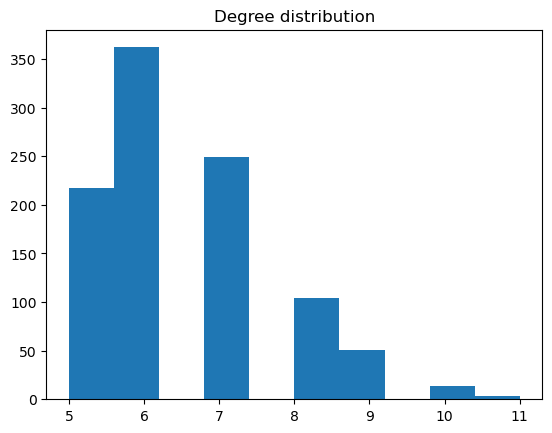

In [11]:
plt.hist([G.degree[i]-1 for i in range(N)])
plt.title("Degree distribution") # centered at 10+1000*0.01=20, as expected

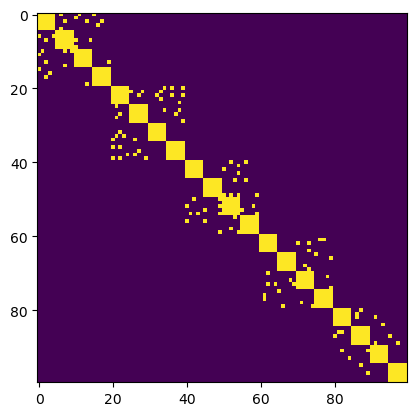

In [30]:
from networkx.convert_matrix import to_numpy_array
A = to_numpy_array(G)
plt.imshow(A[:100, :100]>0)

In [13]:
def run_sim(
    G,
    G_weighted,
    households_dict,
    ALPHA,
    N,
    INIT_PREV,
    T,
    pooling_strategy,
    NUM_SCREENING_GROUPS,
    POOL_SIZE,
    LoD,
    seed=0,
):
    test_model = ViralExtSEIRNetworkModel(
        G = G,
        G_weighted = G_weighted,
        households_dict=households_dict,
        beta = 0.1,
        beta_Q = 0,
        sigma = 0.2,
        lamda = 0.5,
        gamma  = 0.25,
        seed = seed,
        alpha = ALPHA,
        transition_mode="time_in_state",
        initE = N*INIT_PREV,
        verbose=1
    )
    sim = SimulationRunner(
        model=test_model,
        pooling_strategy=pooling_strategy,
        T = T,
        # num_groups = 10,
        num_groups = NUM_SCREENING_GROUPS,
        pool_size = POOL_SIZE,
        LoD=LoD,
        seed = seed,
        save_results=False,
        verbose=2,
        max_dt=0.01,
    )
    sim.run_simulation()

    return sim

In [27]:
A

array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10., 10., 10.],
       [ 0.,  0.,  0., ..., 10., 10., 10.],
       [ 0.,  0.,  0., ..., 10., 10., 10.]])

In [14]:
sim_correlated = run_sim(
    G,
    G_weighted,
    households_dict,
    ALPHA,
    N,
    INIT_PREV,
    T=10,
    pooling_strategy='correlated',
    NUM_SCREENING_GROUPS=NUM_SCREENING_GROUPS,
    POOL_SIZE=POOL_SIZE,
    LoD=LoD,
    seed=0,
)


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]


Running simulation with seed 0 for strategy correlated...
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  7.17it/s]


Viral loads in positive pools:  [[]]
Screening day:  0  self.model.t:  0.01
Running screening for group 0 on day 1...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.49it/s]


Viral loads in positive pools:  [[]]
Screening day:  1  self.model.t:  1.0000000000000007
Running screening for group 0 on day 2...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.30it/s]


Viral loads in positive pools:  [[]]
Screening day:  2  self.model.t:  2.0000000000000013
    Nodes with transition propensities:
        node926, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 926 is transitioning EtoIPRE at time 2.5100302227552906 with timer_state: [2.51003022]; 1/sigma: [2.50189929]; VL: 0.0
{'t': 2.5100302227552906, 'transitionNode': 926, 'transitionNodeVL': 7.0, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node925, in state [1], propensity [('StoE', 1.8181818181818183)]
infected: 925, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {928, 929, 926, 927}, non_household_neighbors: [930, 925]
Household member states: [array([1]), array([1]), array([3]), array([1])]
Non-household member states: [array([1]), array([2])]
Infected node 925 got contribution from infectious contacts {926: 1.0} and quarantined contacts {}
{'t': 2.609019177419311, 'tra

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.17it/s]


Viral loads in positive pools:  [[0.6809018257968757, 7.0, 0.50730833352489, 0.04588978137494055, 0.27847178579952747]]
Screening day:  3  self.model.t:  3.0093531312926673
Running screening for group 0 on day 4...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]


Viral loads in positive pools:  [[0.27847178579952747], [0.6809018257968757], [0.50730833352489, 0.04588978137494055]]
Screening day:  4  self.model.t:  4.009353131292646
    Nodes with transition propensities:
        node926, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 926 is transitioning QPREtoQSYM at time 4.409358790342849 with timer_state: [1.89932857]; 1/lamda: [1.89215065]; VL: 7.0
{'t': 4.409358790342849, 'transitionNode': 926, 'transitionNodeVL': 6.991392241883728, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
Running screening for group 0 on day 5...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


Viral loads in positive pools:  [[3.2448176315384116], [3.601916633772702, 3.124101286737029, 4.070534982336806, 2.126145331090634]]
Screening day:  5  self.model.t:  5.009358790342836
    Nodes with transition propensities:
        node928, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 928 is transitioning EtoIPRE at time 5.479367039864681 with timer_state: [2.54666117]; 1/sigma: [2.53936412]; VL: 4.070534982336806
{'t': 5.479367039864681, 'transitionNode': 928, 'transitionNodeVL': 7.0, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node935, in state [1], propensity [('StoE', 0.4545454545454546)]
infected: 935, transmissionTerms_I: [2.5], transmissionTerms_Q: [0.], household_neighbors: {936, 937, 938, 939}, non_household_neighbors: [928, 935]
Household member states: [array([1]), array([2]), array([1]), array([1])]
Non-household member states: [array([3]), array([2])]
Infected node 935 got

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.77it/s]


Viral loads in positive pools:  [[5.569988724772761], [5.891554979271521, 5.1752752388668855, 7.0], [3.7927249954168984]]
Screening day:  6  self.model.t:  6.003784670170229
    Nodes with transition propensities:
        node925, in state [12], propensity [('QEtoQPRE', 100000.0)]
-- node 925 is transitioning QEtoQPRE at time 6.11381236588509 with timer_state: [3.50479319]; 1/sigma: [3.4987976]; VL: 5.891554979271521
{'t': 6.11381236588509, 'transitionNode': 925, 'transitionNodeVL': 7.0, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node937, in state [12], propensity [('QEtoQPRE', 100000.0)]
-- node 937 is transitioning QEtoQPRE at time 6.263845679982247 with timer_state: [3.45155357]; 1/sigma: [3.44532976]; VL: 6.707817073851353
{'t': 6.263845679982247, 'transitionNode': 937, 'transitionNodeVL': 7.0, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes wit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.51it/s]


Viral loads in positive pools:  [[2.4227406745014552], [5.278210599508507]]
Screening day:  7  self.model.t:  7.0038548209246
    Nodes with transition propensities:
        node929, in state [12], propensity [('QEtoQPRE', 100000.0)]
-- node 929 is transitioning QEtoQPRE at time 7.763886793325309 with timer_state: [4.81453366]; 1/sigma: [4.80683962]; VL: 5.278210599508507
{'t': 7.763886793325309, 'transitionNode': 929, 'transitionNodeVL': 7.0, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node937, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 937 is transitioning QPREtoQSYM at time 7.783888341547238 with timer_state: [1.52004266]; 1/lamda: [1.51488916]; VL: 7.0
{'t': 7.783888341547238, 'transitionNode': 937, 'transitionNodeVL': 6.9938485395360575, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
Running screening for group 0 on day 8...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  7.04it/s]


Viral loads in positive pools:  [[5.296658145525032]]
Screening day:  8  self.model.t:  8.003888341547233
    Nodes with transition propensities:
        node928, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 928 is transitioning QPREtoQSYM at time 8.28392252216473 with timer_state: [2.80455548]; 1/lamda: [2.80173997]; VL: 7.0
{'t': 8.28392252216473, 'transitionNode': 928, 'transitionNodeVL': 6.995008400661288, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node935, in state [12], propensity [('QEtoQPRE', 100000.0)]
-- node 935 is transitioning QEtoQPRE at time 8.503929829547172 with timer_state: [2.95014516]; 1/sigma: [2.94727832]; VL: 6.484275631564694
{'t': 8.503929829547172, 'transitionNode': 935, 'transitionNodeVL': 7.0, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node925, in state [13], pr

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.35it/s]


Viral loads in positive pools:  []
Screening day:  9  self.model.t:  9.00394355007962
    Nodes with transition propensities:
        node935, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 935 is transitioning QPREtoQSYM at time 9.713946807041248 with timer_state: [1.21001698]; 1/lamda: [1.20246533]; VL: 7.0
{'t': 9.713946807041248, 'transitionNode': 935, 'transitionNodeVL': 6.995424468107161, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node929, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 929 is transitioning QPREtoQSYM at time 9.823954228651237 with timer_state: [2.06006744]; 1/lamda: [2.05087776]; VL: 7.0
{'t': 9.823954228651237, 'transitionNode': 929, 'transitionNodeVL': 6.991770480270202, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0


In [174]:
len(sim_correlated.model.infectionsLog)

9

Text(0.5, 1.0, '# susceptible neighbors')

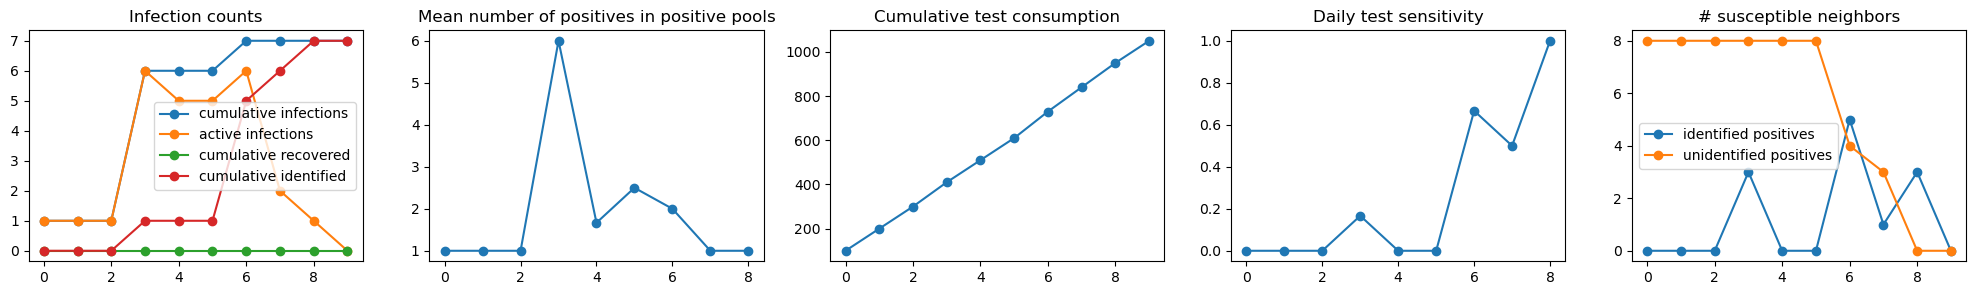

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(25, 3))

sim = sim_correlated

axs[0].plot([sim.overall_results[i]["cumInfections"] for i in range(len(sim.overall_results))], "-o", label="cumulative infections")
axs[0].plot([sim.overall_results[i]["numActiveInfections"] for i in range(len(sim.overall_results))], "-o", label="active infections")
axs[0].plot([sim.overall_results[i]["cumRecovered"] for i in range(len(sim.overall_results))], "-o", label="cumulative recovered")
axs[0].plot([sim.overall_results[i]["cum_positives_identified"] for i in range(len(sim.overall_results))], "-o", label="cumulative identified")
axs[0].legend()
axs[0].set_title("Infection counts")

axs[1].plot([sim.overall_results[i]["mean_num_positives_in_positive_pool"] for i in range(len(sim.overall_results))], "-o", label="mean_num_positives_in_positive_pool")
axs[1].set_title("Mean number of positives in positive pools")

axs[2].plot([sim.overall_results[i]["cum_num_tests"] for i in range(len(sim.overall_results))], "-o", label="cum_num_tests")
axs[2].set_title("Cumulative test consumption")

axs[3].plot([sim.overall_results[i]["daily_sensitivity"] for i in range(len(sim.overall_results))], "-o", label="daily_sensitivity")
axs[3].set_title("Daily test sensitivity")

axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_identified_positives"] for i in range(len(sim.overall_results))], "-o", label="identified positives")
axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_unidentified_positives"] for i in range(len(sim.overall_results))], "-o", label="unidentified positives")
axs[4].legend()
axs[4].set_title("# susceptible neighbors")

# Naive

In [ ]:
G, households_dict, community_edges_dict = generate_simplified_network_community(N, household_size, community_size, p_random_edge)

# assign higher weights to intra-household edges

import copy
G_weighted = copy.deepcopy(G)

for node, household in households_dict.items():
    for j in household:
        G[node][j]["weight"] = WEIGHT
        G_weighted[node][j]["weight"] = 10**10

for node, community in community_edges_dict.items():
    for j in community:
        G[node][j]["weight"] = WEIGHT / 2
        G_weighted[node][j]["weight"] = 10**8
        
sim_naive = run_sim(
    G,
    G_weighted,
    households_dict,
    ALPHA,
    N,
    INIT_PREV,
    T=20,
    pooling_strategy='naive',
    NUM_SCREENING_GROUPS=NUM_SCREENING_GROUPS,
    POOL_SIZE=POOL_SIZE,
    LoD=LoD,
    seed=0,
)


In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(25, 3))

sim = sim_naive

axs[0].plot([sim.overall_results[i]["cumInfections"] for i in range(len(sim.overall_results))], "-o", label="cumulative infections")
axs[0].plot([sim.overall_results[i]["numActiveInfections"] for i in range(len(sim.overall_results))], "-o", label="active infections")
axs[0].plot([sim.overall_results[i]["cumRecovered"] for i in range(len(sim.overall_results))], "-o", label="cumulative recovered")
axs[0].plot([sim.overall_results[i]["cum_positives_identified"] for i in range(len(sim.overall_results))], "-o", label="cumulative identified")
axs[0].legend()
axs[0].set_title("Infection counts")

axs[1].plot([sim.overall_results[i]["mean_num_positives_in_positive_pool"] for i in range(len(sim.overall_results))], "-o", label="mean_num_positives_in_positive_pool")
axs[1].set_title("Mean number of positives in positive pools")

axs[2].plot([sim.overall_results[i]["cum_num_tests"] for i in range(len(sim.overall_results))], "-o", label="cum_num_tests")
axs[2].set_title("Cumulative test consumption")

axs[3].plot([sim.overall_results[i]["daily_sensitivity"] for i in range(len(sim.overall_results))], "-o", label="daily_sensitivity")
axs[3].set_title("Daily test sensitivity")

axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_identified_positives"] for i in range(len(sim.overall_results))], "-o", label="identified positives")
axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_unidentified_positives"] for i in range(len(sim.overall_results))], "-o", label="unidentified positives")
axs[4].legend()
axs[4].set_title("# susceptible neighbors")

In [ ]:
len(sim_naive.model.infectionsLog)